In [138]:
#import necessary libraries
import numpy as np
import pandas as pd
from datetime import datetime

In [139]:
#read the data
data = pd.read_csv("bank transactions.csv")
df = pd.DataFrame(data)

In [140]:
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/1994,F,JAMSHEDPUR,17819.05,2/8/2016,143207,25.0
1,T2,C2142763,4/4/1957,M,JHAJJAR,2270.69,2/8/2016,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/2016,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/2016,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/2016,181156,1762.5


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


In [142]:
df.describe()

,CustAccountBalance,TransactionTime,TransactionAmount (INR)
count,1.046198e+06,1.048567e+06,1.048567e+06
mean,1.154035e+05,1.570875e+05,1.574335e+03
std,8.464854e+05,5.126185e+04,6.574743e+03
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.721760e+03,1.240300e+05,1.610000e+02
50%,1.679218e+04,1.642260e+05,4.590300e+02
75%,5.765736e+04,2.000100e+05,1.200000e+03
max,1.150355e+08,2.359590e+05,1.560035e+06


In [143]:
#convert unix transaction time to timestamp
df["TransactionTime"] = df["TransactionTime"].apply(lambda date: datetime.fromtimestamp(date).strftime('%H:%M:%S'))
df

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/1994,F,JAMSHEDPUR,17819.05,2/8/2016,17:46:47,25.0
1,T2,C2142763,4/4/1957,M,JHAJJAR,2270.69,2/8/2016,17:24:18,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/2016,17:38:32,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/2016,17:38:34,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/2016,04:19:16,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,8/4/1990,M,NEW DELHI,7635.19,18/9/16,05:20:24,799.0
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,05:02:14,460.0
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,04:55:13,770.0
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,05:18:26,1000.0


In [144]:
#combine TransactionDate and TransactionTime into one column
df["TransactionDateTime"] = pd.to_datetime(df['TransactionDate'] + ' ' + df['TransactionTime'])
df

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),TransactionDateTime
0,T1,C5841053,10/1/1994,F,JAMSHEDPUR,17819.05,2/8/2016,17:46:47,25.0,2016-02-08 17:46:47
1,T2,C2142763,4/4/1957,M,JHAJJAR,2270.69,2/8/2016,17:24:18,27999.0,2016-02-08 17:24:18
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/2016,17:38:32,459.0,2016-02-08 17:38:32
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/2016,17:38:34,2060.0,2016-02-08 17:38:34
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/2016,04:19:16,1762.5,2016-02-08 04:19:16
...,...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,8/4/1990,M,NEW DELHI,7635.19,18/9/16,05:20:24,799.0,2016-09-18 05:20:24
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,05:02:14,460.0,2016-09-18 05:02:14
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,04:55:13,770.0,2016-09-18 04:55:13
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,05:18:26,1000.0,2016-09-18 05:18:26


In [145]:
#pickup necessary columns for analysis
filtered_data = df[['TransactionID', 'CustomerID', 'CustLocation', 'TransactionDateTime', 'TransactionAmount (INR)']]
filtered_data

,TransactionID,CustomerID,CustLocation,TransactionDateTime,TransactionAmount (INR)
0,T1,C5841053,JAMSHEDPUR,2016-02-08 17:46:47,25.0
1,T2,C2142763,JHAJJAR,2016-02-08 17:24:18,27999.0
2,T3,C4417068,MUMBAI,2016-02-08 17:38:32,459.0
3,T4,C5342380,MUMBAI,2016-02-08 17:38:34,2060.0
4,T5,C9031234,NAVI MUMBAI,2016-02-08 04:19:16,1762.5
...,...,...,...,...,...
1048562,T1048563,C8020229,NEW DELHI,2016-09-18 05:20:24,799.0
1048563,T1048564,C6459278,NASHIK,2016-09-18 05:02:14,460.0
1048564,T1048565,C6412354,HYDERABAD,2016-09-18 04:55:13,770.0
1048565,T1048566,C6420483,VISAKHAPATNAM,2016-09-18 05:18:26,1000.0


<AxesSubplot:>

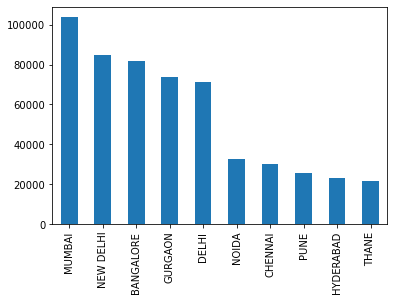

In [146]:
#plot the data to see major locations
filtered_data['CustLocation'].value_counts()[:10].plot(kind='bar')

In [147]:
filtered_data.describe()

,TransactionAmount (INR)
count,1.048567e+06
mean,1.574335e+03
std,6.574743e+03
min,0.000000e+00
25%,1.610000e+02
50%,4.590300e+02
75%,1.200000e+03
max,1.560035e+06


In [148]:
filtered_data.nunique()

TransactionID              1048567
CustomerID                  884265
CustLocation                  9355
TransactionDateTime         822545
TransactionAmount (INR)      93024
dtype: int64

In [149]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 5 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   TransactionID            1048567 non-null  object        
 1   CustomerID               1048567 non-null  object        
 2   CustLocation             1048416 non-null  object        
 3   TransactionDateTime      1048567 non-null  datetime64[ns]
 4   TransactionAmount (INR)  1048567 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 40.0+ MB


In [150]:
PRESENT = datetime(2016,12,11)

In [151]:
filtered_data['TransactionDateTime'].min(), filtered_data['TransactionDateTime'].max()

(Timestamp('2016-01-08 00:00:03'), Timestamp('2016-12-09 23:59:14'))

In [152]:
rfm = filtered_data.groupby('CustomerID').agg({'TransactionDateTime': lambda date: (PRESENT - date.max()).days, 'TransactionID': lambda num: len(num), 'TransactionAmount (INR)': lambda amount: amount.sum()})
rfm

,TransactionDateTime,TransactionID,TransactionAmount (INR)
CustomerID,,,
C1010011,75,2,5106.0
C1010012,118,1,1499.0
C1010014,155,2,1455.0
C1010018,86,1,30.0
C1010024,114,1,5000.0
...,...,...,...
C9099836,155,1,691.0
C9099877,86,1,222.0
C9099919,114,1,126.0


In [153]:
rfm.columns = ['recency', 'frequency', 'monetary']
rfm

,recency,frequency,monetary
CustomerID,,,
C1010011,75,2,5106.0
C1010012,118,1,1499.0
C1010014,155,2,1455.0
C1010018,86,1,30.0
C1010024,114,1,5000.0
...,...,...,...
C9099836,155,1,691.0
C9099877,86,1,222.0
C9099919,114,1,126.0


In [154]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 884265 entries, C1010011 to C9099956
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   recency    884265 non-null  int64  
 1   frequency  884265 non-null  int64  
 2   monetary   884265 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 27.0+ MB


In [159]:
rfm['r_quartile'] = pd.qcut(rfm['recency'], 4, labels=['1','2','3','4'])
rfm['f_quartile'] = pd.cut(rfm['frequency'], 4, labels=['4','3','2','1'])
rfm['m_quartile'] = pd.qcut(rfm['monetary'], 4, labels=['4','3','2','1'])

In [160]:
rfm

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile
CustomerID,,,,,,
C1010011,75,2,5106.0,1,4,1
C1010012,118,1,1499.0,3,4,2
C1010014,155,2,1455.0,4,4,2
C1010018,86,1,30.0,1,4,4
C1010024,114,1,5000.0,3,4,1
...,...,...,...,...,...,...
C9099836,155,1,691.0,4,4,2
C9099877,86,1,222.0,1,4,3
C9099919,114,1,126.0,3,4,4


In [161]:
rfm['RFM_Score'] = rfm.r_quartile.astype(str) + rfm.f_quartile.astype(str) + rfm.m_quartile.astype(str)

In [162]:
rfm

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFM_Score
CustomerID,,,,,,,
C1010011,75,2,5106.0,1,4,1,141
C1010012,118,1,1499.0,3,4,2,342
C1010014,155,2,1455.0,4,4,2,442
C1010018,86,1,30.0,1,4,4,144
C1010024,114,1,5000.0,3,4,1,341
...,...,...,...,...,...,...,...
C9099836,155,1,691.0,4,4,2,442
C9099877,86,1,222.0,1,4,3,143
C9099919,114,1,126.0,3,4,4,344


In [166]:
rfm[rfm['RFM_Score']=='111'].sort_values('monetary', ascending =False).head()

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFM_Score
CustomerID,,,,,,,
C4325361,32,5,201267.21,1,1,1,111
C4917867,87,5,74256.00,1,1,1,111
C7839756,86,5,38573.00,1,1,1,111
C6735715,83,5,29904.00,1,1,1,111
C2520287,32,5,29257.31,1,1,1,111
